In [147]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA

In [148]:
file_path = 'C:\\Users\\ifree\\Downloads\\Cosas de Francheska\\marketing_campaign.csv'
data = pd.read_csv(file_path, sep="\t")

print("Number of datapoints:", len(data))
data.head()

Number of datapoints: 2240


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [149]:
missing_data = data.isna().sum()
missing_data

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [150]:
data = data.dropna()
print("The total number of data-points after removing the rows with missing values are:", len(data))

The total number of data-points after removing the rows with missing values are: 2216


In [151]:
data["Age"] = 2023-data["Year_Birth"]
data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]
data["Living_With"]=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})
data["Children"]=data["Kidhome"]+data["Teenhome"]
data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2})+ data["Children"]
data["Is_Parent"] = np.where(data.Children> 0, 1, 0)
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(to_drop, axis=1)

In [152]:
data.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.073105,0.064079,0.013538,0.009477,0.150271,54.179603,607.075361,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.260367,0.244950,0.115588,0.096907,0.357417,11.985554,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,46.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,53.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,64.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,130.000000,2525.000000,3.000000,5.000000,1.000000


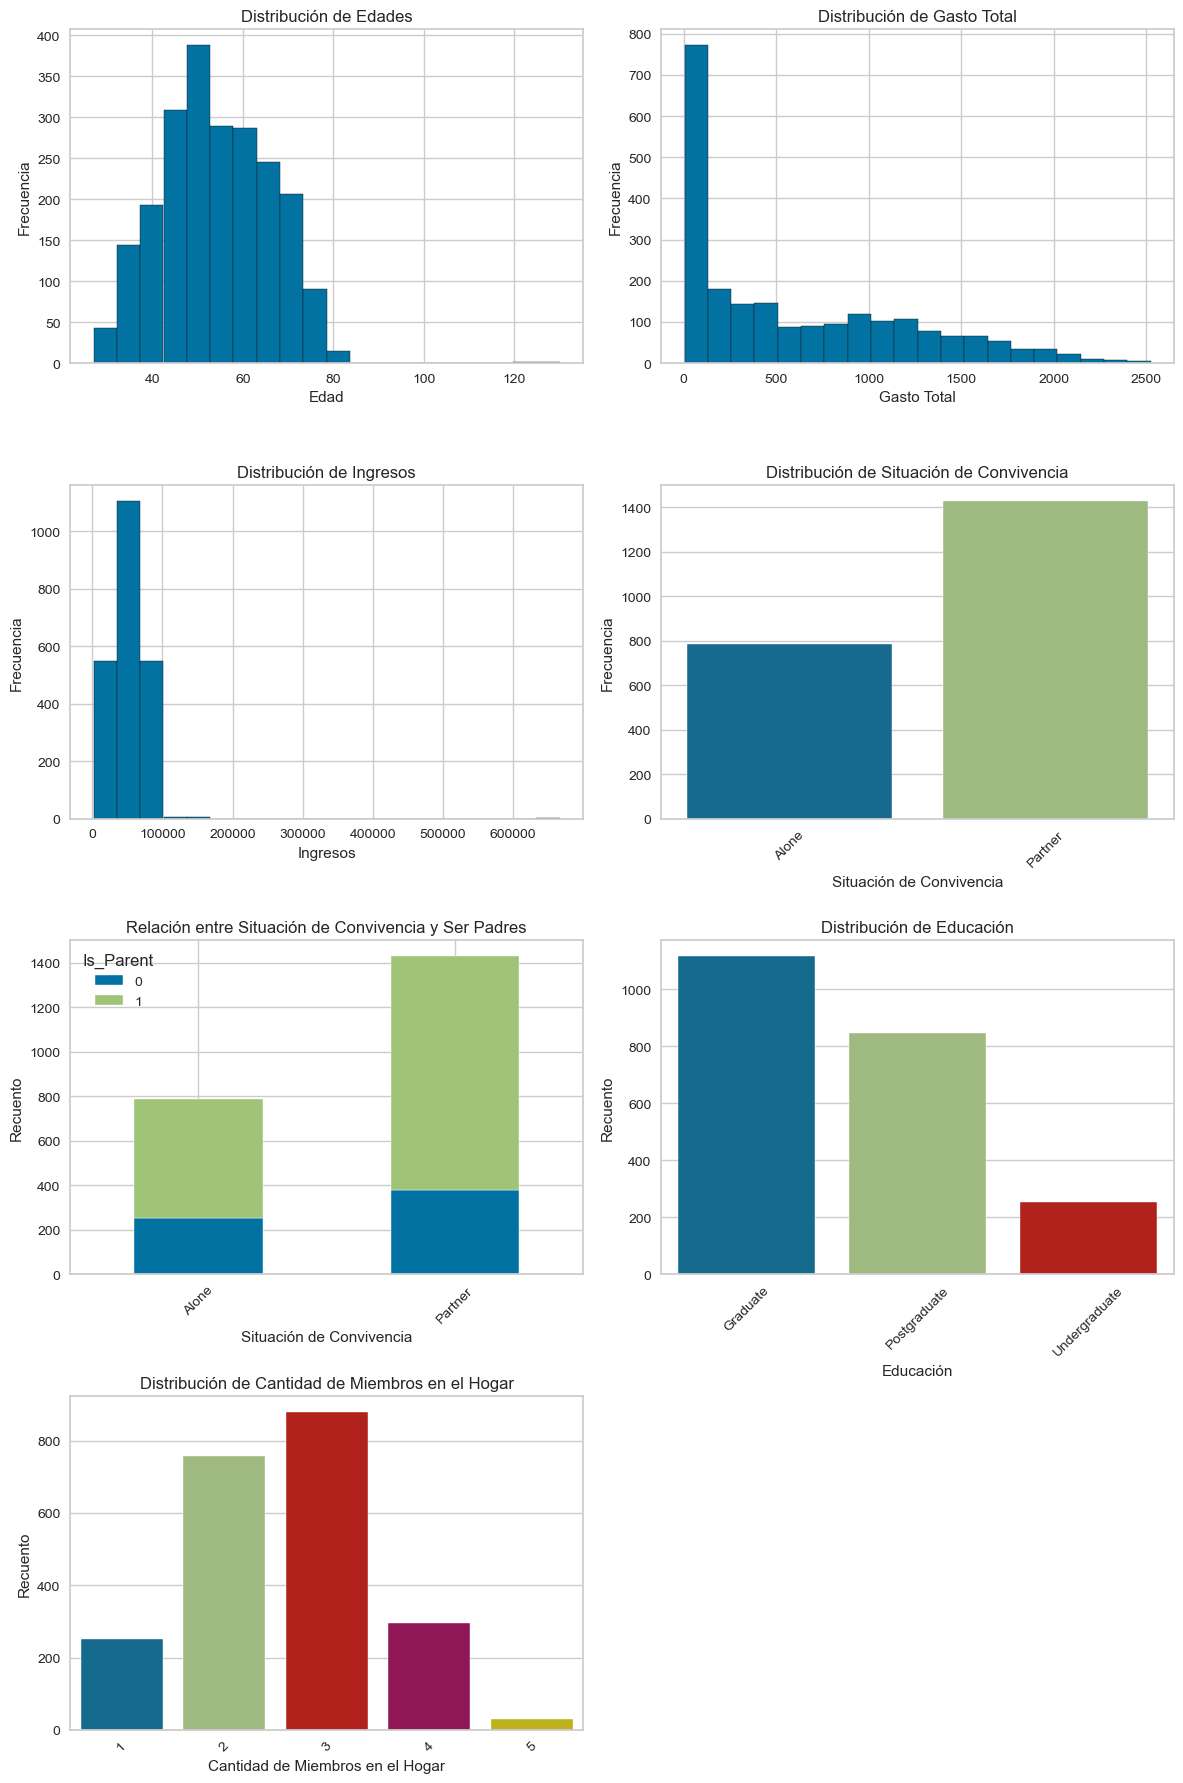

In [153]:
fig, axs = plt.subplots(4, 2, figsize=(12, 18))
fig.subplots_adjust(hspace=0.5)


axs[0, 0].hist(data['Age'], bins=20, edgecolor='k')
axs[0, 0].set_xlabel('Edad')
axs[0, 0].set_ylabel('Frecuencia')
axs[0, 0].set_title('Distribución de Edades')


axs[1, 0].hist(data['Income'], bins=20, edgecolor='k')
axs[1, 0].set_xlabel('Ingresos')
axs[1, 0].set_ylabel('Frecuencia')
axs[1, 0].set_title('Distribución de Ingresos')


axs[0, 1].hist(data['Spent'], bins=20, edgecolor='k')
axs[0, 1].set_xlabel('Gasto Total')
axs[0, 1].set_ylabel('Frecuencia')
axs[0, 1].set_title('Distribución de Gasto Total')


sns.countplot(x='Living_With', data=data, ax=axs[1, 1])
axs[1, 1].set_xlabel('Situación de Convivencia')
axs[1, 1].set_ylabel('Frecuencia')
axs[1, 1].set_title('Distribución de Situación de Convivencia')
axs[1, 1].tick_params(axis='x', rotation=45)


pd.crosstab(data['Living_With'], data['Is_Parent']).plot(kind='bar', stacked=True, ax=axs[2, 0])
axs[2, 0].set_xlabel('Situación de Convivencia')
axs[2, 0].set_ylabel('Recuento')
axs[2, 0].set_title('Relación entre Situación de Convivencia y Ser Padres')
axs[2, 0].tick_params(axis='x', rotation=45)


sns.countplot(x='Education', data=data, ax=axs[2, 1])
axs[2, 1].set_xlabel('Educación')
axs[2, 1].set_ylabel('Recuento')
axs[2, 1].set_title('Distribución de Educación')
axs[2, 1].tick_params(axis='x', rotation=45)


sns.countplot(x='Family_Size', data=data, ax=axs[3, 0])
axs[3, 0].set_xlabel('Cantidad de Miembros en el Hogar')
axs[3, 0].set_ylabel('Recuento')
axs[3, 0].set_title('Distribución de Cantidad de Miembros en el Hogar')
axs[3, 0].tick_params(axis='x', rotation=45)


axs[3, 1].axis('off')


plt.tight_layout()
plt.show()


In [154]:
data = data[(data['Age'] <= 100) & (data['Income'] <= 500000)]

C:\Users\ifree\AppData\Local\Temp\ipykernel_9712\163773317.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


Income - Wines
Income - Meat
Income - NumCatalogPurchases
Income - NumStorePurchases
Income - NumWebVisitsMonth
Income - Spent
Kidhome - Children
Teenhome - Children
Wines - Income
Wines - NumCatalogPurchases
Wines - NumStorePurchases
Wines - Spent
Fruits - Spent
Meat - Income
Meat - NumCatalogPurchases
Meat - Spent
Fish - Spent
Sweets - Spent
NumCatalogPurchases - Income
NumCatalogPurchases - Wines
NumCatalogPurchases - Meat
NumCatalogPurchases - Spent
NumStorePurchases - Income
NumStorePurchases - Wines
NumStorePurchases - Spent
NumWebVisitsMonth - Income
Spent - Income
Spent - Wines
Spent - Fruits
Spent - Meat
Spent - Fish
Spent - Sweets
Spent - NumCatalogPurchases
Spent - NumStorePurchases
Children - Kidhome
Children - Teenhome
Children - Family_Size
Children - Is_Parent
Family_Size - Children
Family_Size - Is_Parent
Is_Parent - Children
Is_Parent - Family_Size


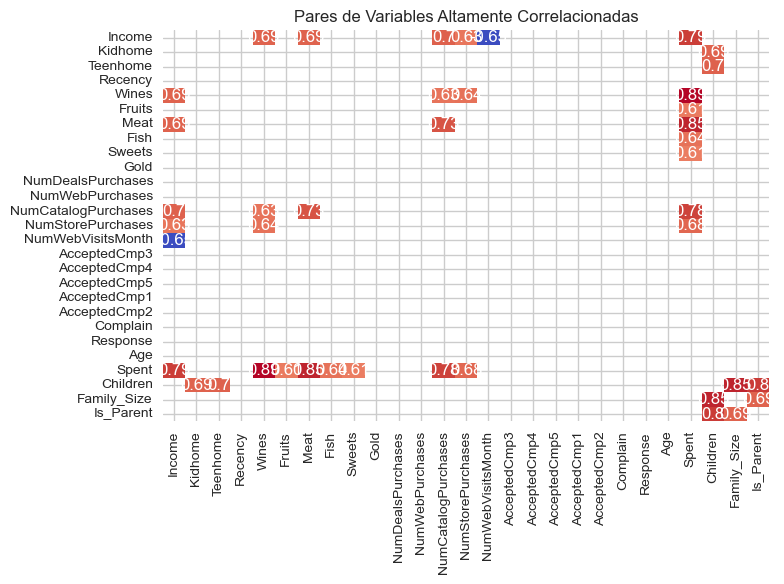

In [156]:
correlation_matrix = data.corr()
threshold = 0.6
highly_correlated = (correlation_matrix.abs() > threshold) & (correlation_matrix != 1.0)

correlated_variables = []
for col in highly_correlated.columns:
    correlated_vars = highly_correlated.index[highly_correlated[col]].tolist()
    for var in correlated_vars:
        correlated_variables.append((col, var))

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix[highly_correlated], annot=True, cmap='coolwarm', cbar=False)
plt.title('Pares de Variables Altamente Correlacionadas')

for pair in correlated_variables:
    print(f"{pair[0]} - {pair[1]}")

plt.tight_layout()
plt.show()



In [157]:
segmentation_data = data[['Age', 'Income', 'Spent', 'Education', 'Living_With', 'Is_Parent', 'Family_Size']]
label_encoder = LabelEncoder()
segmentation_data['Education'] = label_encoder.fit_transform(segmentation_data['Education'])
segmentation_data['Living_With'] = label_encoder.fit_transform(segmentation_data['Living_With'])

scaler = StandardScaler()
segmentation_data_scaled = scaler.fit_transform(segmentation_data)

C:\Users\ifree\AppData\Local\Temp\ipykernel_9712\1563420770.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segmentation_data['Education'] = label_encoder.fit_transform(segmentation_data['Education'])
C:\Users\ifree\AppData\Local\Temp\ipykernel_9712\1563420770.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segmentation_data['Living_With'] = label_encoder.fit_transform(segmentation_data['Living_With'])


C:\Users\ifree\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ifree\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\ifree\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ifree\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

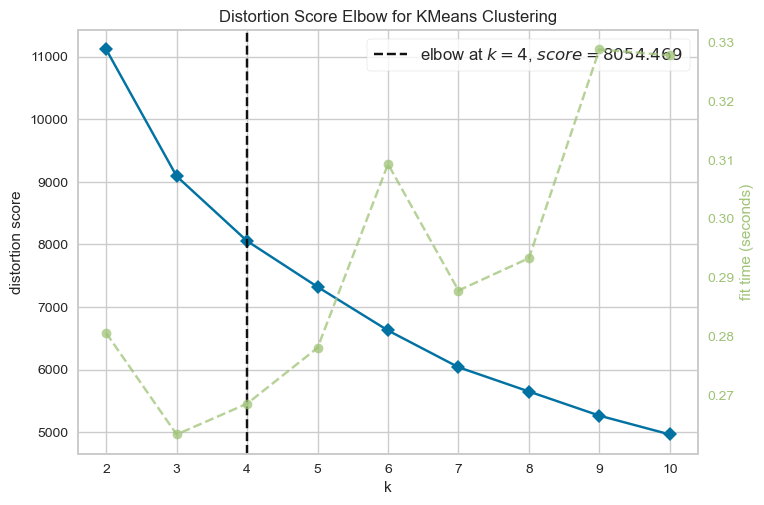

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [158]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(segmentation_data_scaled)
Elbow_M.show()

C:\Users\ifree\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


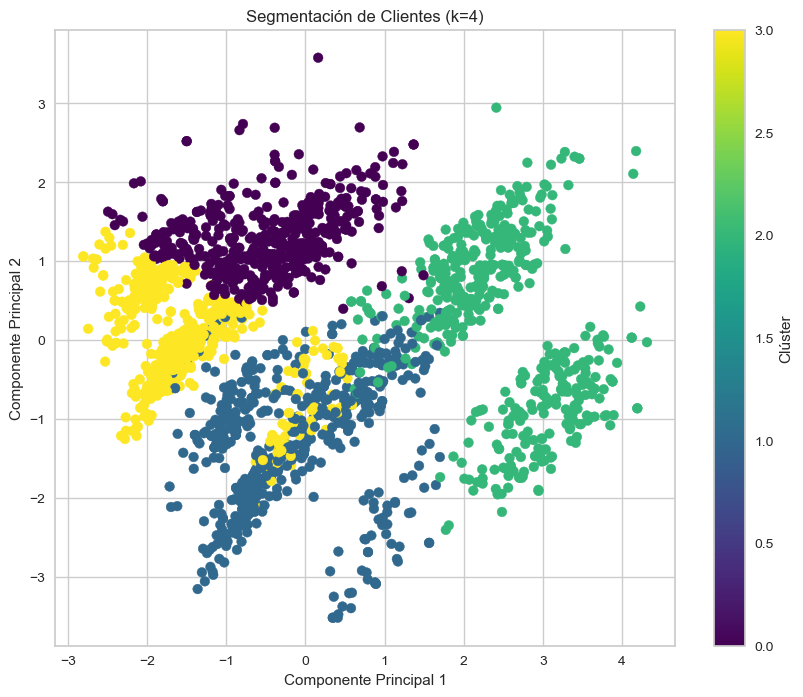

In [159]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(segmentation_data_scaled)

data['Cluster'] = kmeans.labels_

pca = PCA(n_components=2)
pca_data = pca.fit_transform(segmentation_data_scaled)

plt.figure(figsize=(10, 8))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=data['Cluster'], cmap='viridis')
plt.title('Segmentación de Clientes (k=4)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Clúster')
plt.show()

In [165]:
cluster_stats = data.groupby('Cluster')[['Age', 'Income', 'Spent', 'Education', 'Living_With', 'Is_Parent', 'Family_Size']].describe()
education_counts = data.groupby('Cluster')['Education'].value_counts().unstack(fill_value=0)
living_with_counts = data.groupby('Cluster')['Living_With'].value_counts().unstack(fill_value=0)
education_counts.columns = ['Cluster_' + str(col) for col in education_counts.columns]
living_with_counts.columns = ['Cluster_' + str(col) for col in living_with_counts.columns]
promedio_gasto_por_cluster = data.groupby('Cluster')['Spent'].mean()


print(cluster_stats)
print("Conteo de la variable 'education' por cluster:")
print(education_counts)

print("\nConteo de la variable 'living_with' por cluster:")
print(living_with_counts)
print(promedio_gasto_por_cluster)

           Age                                                       Income  \
         count       mean        std   min    25%   50%    75%   max  count   
Cluster                                                                       
0        521.0  59.894434   9.518928  34.0  52.00  61.0  68.00  77.0  521.0   
1        576.0  53.847222  11.019237  28.0  46.75  53.0  61.25  83.0  576.0   
2        508.0  55.255906  14.190361  28.0  43.00  55.0  67.00  82.0  508.0   
3        607.0  48.349259   8.658916  27.0  42.00  48.0  53.00  77.0  607.0   

                       ... Is_Parent      Family_Size                      \
                 mean  ...       75%  max       count      mean       std   
Cluster                ...                                                  
0        60311.117083  ...       1.0  1.0       521.0  3.324376  0.537409   
1        43400.654514  ...       1.0  1.0       576.0  2.203125  0.642325   
2        75954.551181  ...       0.0  1.0       508.0  1.6122